In [344]:
import pandas as pd
import numpy as np

In [345]:
cr = pd.read_csv("croprecommendation.csv")
cr.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [346]:
cr.drop(columns=['rainfall'], inplace=True)

In [347]:
cr.head()

,N,P,K,temperature,humidity,ph,label
0,90,42,43,20.879744,82.002744,6.502985,rice
1,85,58,41,21.770462,80.319644,7.038096,rice
2,60,55,44,23.004459,82.320763,7.840207,rice
3,74,35,40,26.491096,80.158363,6.980401,rice
4,78,42,42,20.130175,81.604873,7.628473,rice


In [348]:
cr.describe()

,N,P,K,temperature,humidity,ph
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091


In [349]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   label        2200 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 120.4+ KB


In [350]:
cr.rename(columns={'label':'crop'}, inplace=True)

In [351]:
cr.head()

,N,P,K,temperature,humidity,ph,crop
0,90,42,43,20.879744,82.002744,6.502985,rice
1,85,58,41,21.770462,80.319644,7.038096,rice
2,60,55,44,23.004459,82.320763,7.840207,rice
3,74,35,40,26.491096,80.158363,6.980401,rice
4,78,42,42,20.130175,81.604873,7.628473,rice


In [352]:
crops = cr['crop'].unique()
crops

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [353]:
mean_df = pd.DataFrame()

In [354]:
for item in crops:
    rice_num = cr[cr['crop'] == item]
    mean_v = rice_num.drop(columns='crop').mean()
    mean_row = pd.DataFrame([mean_v],columns=mean_v.index)
    mean_row['crop'] = item
    mean_df = pd.concat([mean_df, mean_row], ignore_index=True)

In [355]:
mean_df.head()

,N,P,K,temperature,humidity,ph,crop
0,79.89,47.58,39.87,23.689332,82.272822,6.425471,rice
1,77.76,48.44,19.79,22.389204,65.092249,6.245190,maize
2,40.09,67.79,79.92,18.872847,16.860439,7.336957,chickpea
3,20.75,67.54,20.05,20.115085,21.605357,5.749411,kidneybeans
4,20.73,67.73,20.29,27.741762,48.061633,5.794175,pigeonpeas


In [356]:
mean_df

,N,P,K,temperature,humidity,ph,crop
0,79.89,47.58,39.87,23.689332,82.272822,6.425471,rice
1,77.76,48.44,19.79,22.389204,65.092249,6.245190,maize
2,40.09,67.79,79.92,18.872847,16.860439,7.336957,chickpea
3,20.75,67.54,20.05,20.115085,21.605357,5.749411,kidneybeans
4,20.73,67.73,20.29,27.741762,48.061633,5.794175,pigeonpeas
5,21.44,48.01,20.23,28.194920,53.160418,6.831174,mothbeans
6,20.99,47.28,19.87,28.525775,85.499975,6.723957,mungbean
7,40.02,67.47,19.24,29.973340,65.118426,7.133952,blackgram
8,18.77,68.36,19.41,24.509052,64.804785,6.927932,lentil
9,18.87,18.75,40.21,21.837842,90.125504,6.429172,pomegranate


In [357]:
mean_df.to_csv('meancrop.csv', index=False)

In [358]:
cr.head()

,N,P,K,temperature,humidity,ph,crop
0,90,42,43,20.879744,82.002744,6.502985,rice
1,85,58,41,21.770462,80.319644,7.038096,rice
2,60,55,44,23.004459,82.320763,7.840207,rice
3,74,35,40,26.491096,80.158363,6.980401,rice
4,78,42,42,20.130175,81.604873,7.628473,rice


In [359]:
from sklearn.preprocessing import OneHotEncoder

In [360]:
features = cr[['N','P','K','temperature', 'humidity','ph']]
label = cr['crop']
features.head()

,N,P,K,temperature,humidity,ph
0,90,42,43,20.879744,82.002744,6.502985
1,85,58,41,21.770462,80.319644,7.038096
2,60,55,44,23.004459,82.320763,7.840207
3,74,35,40,26.491096,80.158363,6.980401
4,78,42,42,20.130175,81.604873,7.628473


In [361]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 103.3 KB


In [362]:
n_features = features.shape[1]
n_features

6

In [363]:
features.to_csv("cr_features.csv", index=False)

In [364]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(label)

In [365]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [366]:
features

array([[0.64285714, 0.26428571, 0.19      , 0.34588614, 0.79026683,
        0.46626364],
       [0.60714286, 0.37857143, 0.18      , 0.37144489, 0.77063285,
        0.54948026],
       [0.42857143, 0.35714286, 0.195     , 0.4068539 , 0.79397664,
        0.67421877],
       ...,
       [0.84285714, 0.2       , 0.125     , 0.43920235, 0.61788046,
        0.44443315],
       [0.83571429, 0.19285714, 0.145     , 0.50062653, 0.44175991,
        0.50604494],
       [0.74285714, 0.09285714, 0.125     , 0.42402921, 0.53822177,
        0.50931694]])

Training Data

In [367]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)

In [368]:
cr.to_csv("croprecom.csv", index=False)

In [369]:
train_labels

array([16,  2, 10, ..., 12,  7, 10])

In [370]:
test_data

array([[0.72142857, 0.08571429, 0.21      , 0.59306878, 0.93873276,
        0.41682113],
       [0.7       , 0.02142857, 0.23      , 0.49795587, 0.84299238,
        0.42837304],
       [0.42142857, 0.40714286, 0.22      , 0.99096186, 0.92265909,
        0.5344578 ],
       ...,
       [0.86428571, 0.3       , 0.055     , 0.42410452, 0.75868853,
        0.6560289 ],
       [0.82857143, 0.33571429, 0.07      , 0.40508367, 0.71291334,
        0.40585322],
       [0.03571429, 0.45      , 0.075     , 0.29320468, 0.21987947,
        0.40696371]])

In [371]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model = clf.fit(train_data,train_labels)

In [372]:
import joblib
joblib.dump(scaler,'scaler2.pkl')
joblib.dump(model, 'SFS2.pkl')

['SFS2.pkl']

In [373]:
y_pred = model.predict(test_data)
predicted_labels = label_encoder.inverse_transform(y_pred.astype(int))
print(predicted_labels)

['muskmelon' 'watermelon' 'papaya' 'papaya' 'apple' 'mango' 'apple'
 'mothbeans' 'mungbean' 'lentil' 'blackgram' 'coconut' 'pomegranate'
 'jute' 'coconut' 'pomegranate' 'apple' 'maize' 'papaya' 'muskmelon'
 'coffee' 'papaya' 'orange' 'papaya' 'chickpea' 'jute' 'mungbean' 'orange'
 'pigeonpeas' 'rice' 'pomegranate' 'mothbeans' 'jute' 'lentil' 'jute'
 'blackgram' 'jute' 'chickpea' 'chickpea' 'kidneybeans' 'papaya' 'mango'
 'blackgram' 'maize' 'mungbean' 'maize' 'pigeonpeas' 'coconut' 'muskmelon'
 'maize' 'blackgram' 'coffee' 'grapes' 'mungbean' 'coffee' 'kidneybeans'
 'cotton' 'apple' 'banana' 'lentil' 'watermelon' 'coconut' 'lentil'
 'orange' 'papaya' 'pigeonpeas' 'orange' 'rice' 'muskmelon' 'pigeonpeas'
 'muskmelon' 'coconut' 'jute' 'banana' 'blackgram' 'papaya' 'banana'
 'cotton' 'watermelon' 'orange' 'coffee' 'chickpea' 'rice' 'mothbeans'
 'orange' 'mango' 'coffee' 'mothbeans' 'blackgram' 'pomegranate' 'maize'
 'mothbeans' 'cotton' 'papaya' 'pigeonpeas' 'mothbeans' 'kidneybeans'
 'co

In [374]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_labels, y_pred)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  0.21363636363636362


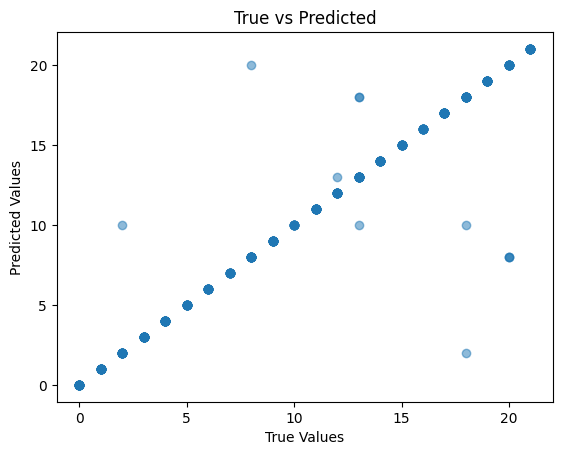

In [375]:
import matplotlib.pyplot as plt

plt.scatter(test_labels, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.show()

In [376]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_labels, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  2.3181818181818183


In [377]:
from sklearn.metrics import r2_score

r2 = r2_score(test_labels, y_pred)
print("R Squared Error: ", r2)

R Squared Error:  0.9452276208516299


In [378]:
crop_names = clf.classes_
crop_names

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [390]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


model = joblib.load('SFS2.pkl')
scaler = joblib.load('scaler2.pkl')


input_data = {
    'N': [57],  
    'P': [58],  
    'K': [77],   
    'temperature': [18.72649425], 
    'humidity': [17.58406365], 
    'ph': [7.978996755] 
}

featur = pd.DataFrame(input_data)
featur = scaler.transform(featur)

prediction = model.predict(featur)

print("Predicted Crop:", prediction)


Predicted Crop: [3]


In [398]:
prediction.astype(int)

array([3])

In [391]:
featur

array([[0.40714286, 0.37857143, 0.36      , 0.2840996 , 0.03879929,
        0.69580233]])

In [392]:
prediction.astype(int)

array([3])

In [393]:
cropn = label_encoder.inverse_transform(prediction.astype(int))
cropn

array(['chickpea'], dtype=object)

In [394]:
joblib.dump(label_encoder,'label_encoder.pkl')

['label_encoder.pkl']